<a href="https://colab.research.google.com/github/diegoax/ALNAE-2025/blob/main/notebooks/clase13_ALNAE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 12 (Viernes 1 de mayo, 2025)
---

# SVD continuado 2

# Aproximación de matrices de rango bajo en norma operador

Este notebook estudia la diferencia en norma de operador entre:

- Una matriz diagonal $A = \operatorname{diag}(1, 2, ..., 10)$
- Matrices aleatorias de rango 5
- La mejor aproximación de rango 5 a $A$, es la dada por la truncación de su SVD, es decir $A_5=\operatorname{diag}(1,2,3,4,5,0,
\ldots,0)$.

Visualizamos los errores para comparar su magnitud.


In [13]:
using LinearAlgebra, Random, Plots

# 1. Matriz diagonal A = diag(1, 2, ..., 10)
A = Diagonal(1:10)



10×10 Diagonal{Int64, UnitRange{Int64}}:
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  2  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  3  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  4  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  5  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  6  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  7  ⋅  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  8  ⋅   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  9   ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  10

In [22]:
# 2. Función para generar matrices aleatorias de rango 5
function random_rank_r_matrix(m::Int, n::Int, r::Int)
    U = randn(m, r)
    V = randn(n, r)
    return U * V'
end

random_rank_r_matrix (generic function with 1 method)

Por qué el output es una matriz de rango 5?

In [24]:
B=random_rank_r_matrix(20,20,3)
rank(B)

3

In [17]:
# 3. Número de muestras aleatorias
num_samples = 100

100

In [27]:
# 4. Mejor aproximación de rango 5 vía SVD
U, S, V = svd(Matrix(A))
S_trunc = Diagonal(vcat(S[1:5], zeros(5)))
A_best_rank5 = U * S_trunc * V'
error_best = opnorm(A - A_best_rank5)

5.0

In [28]:
# 5. Errores con matrices aleatorias
errors_random = [opnorm(A - random_rank_r_matrix(10, 10, 5)) for _ in 1:num_samples]

100-element Vector{Float64}:
 15.898542991744907
 13.371074655587986
 20.24032392594224
 21.26624265200042
 19.483403925167256
 18.072068597583186
 17.8947591137629
 18.86292159162954
 18.495025731036552
 19.061367582785202
 21.28684316897013
 21.012498429414396
 19.593820939660212
  ⋮
 18.713389987150197
 17.424689881192624
 18.2840338079233
 19.483932444592828
 18.393897670959877
 15.89739476069165
 24.091988052561646
 23.021611491818767
 18.90547718757825
 25.4031822133565
 24.659075598277738
 16.60490460286678

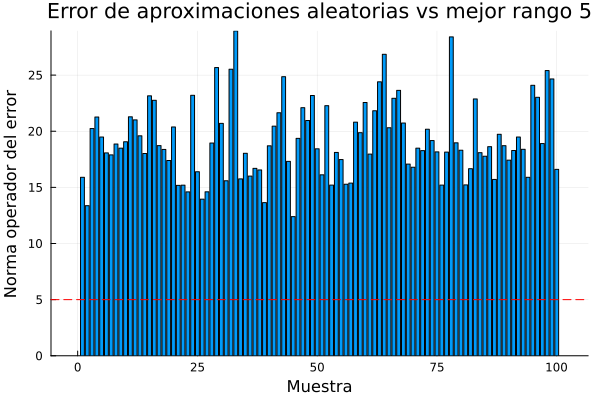

In [29]:
# 6. Gráfico de barras + línea horizontal
bar(1:num_samples, errors_random, xlabel="Muestra", ylabel="Norma operador del error",
    title="Error de aproximaciones aleatorias vs mejor rango 5", legend=false)
hline!([error_best], line=(:red, :dash), label="Mejor aproximación rango 5")


In [30]:
A=random_rank_r_matrix(10, 10, 5)
rank(A)

5

## PCA: Análisis de Componentes Principales

# Análisis en Componentes Principales (PCA)

El objetivo del PCA es encontrar una subvariedad de menor dimensión (una recta, plano, etc.) que se aproxime bien a los datos en alta dimensión.

## Etapas del método:

1. Partimos de una matriz de datos $A_0 \in \mathbb{R}^{m \times n}$ donde:
   - $m$ es el número de variables por individuo (por ejemplo: altura, peso),
   - $n$ es el número de individuos.

2. Centramos los datos: restamos a cada fila su media (cada variable tiene media cero).

3. La matriz centrada $A$ tendrá sus columnas (individuos) con promedio cero:
   $$ \sum_{j=1}^n a_{\cdot j} = 0 $$

4. Aplicamos la descomposición en valores singulares (SVD):
   $$ A = U \Sigma V^T $$

5. El primer vector singular izquierdo $\mathbf{u}_1$ nos da la **dirección principal** donde se agrupan los datos.  
   Es la dirección de la recta que mejor los aproxima (en el sentido de mínimos cuadrados).

## Interpretación geométrica:

Los puntos de datos (columnas de $A$) están cerca de una recta en $\mathbb{R}^2$ o más generalmente, de un subespacio de baja dimensión en $\mathbb{R}^m$.


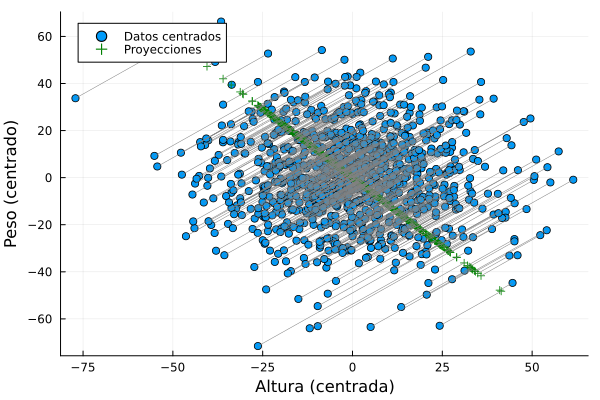

In [44]:
using LinearAlgebra
using Statistics
using Plots
using Random

# Datos simulados para 100 personas: altura y peso

n = 1000
alturas = 160 .+ 20 .* randn(n)
pesos   = 60  .+ 20  .* randn(n)

# Matriz de datos: filas son variables (altura, peso); columnas son individuos
A0 = [alturas'; pesos']

# Centrado de datos
media = mean(A0, dims=2)
A = A0 .- media

# SVD
U, S, Vt = svd(A)
u1 = U[:, 1]  # primera componente principal

# Proyección de los puntos sobre la primera componente
proyecciones = (u1' * A) .* u1  # escala cada punto en la dirección u1

# Gráfico
scatter(A[1, :], A[2, :], label="Datos centrados", xlabel="Altura (centrada)", ylabel="Peso (centrado)", legend=:topleft)
quiver!([0.0], [0.0], quiver=([5*u1[1]], [5*u1[2]]), color=:red, label="1ra componente principal")
scatter!(proyecciones[1, :], proyecciones[2, :], label="Proyecciones", markershape=:cross, color=:green)

# Opcional: líneas desde cada punto a su proyección
for i in 1:n
    plot!([A[1, i], proyecciones[1, i]], [A[2, i], proyecciones[2, i]], color=:gray, lw=0.5, label=false)
end
display(current())

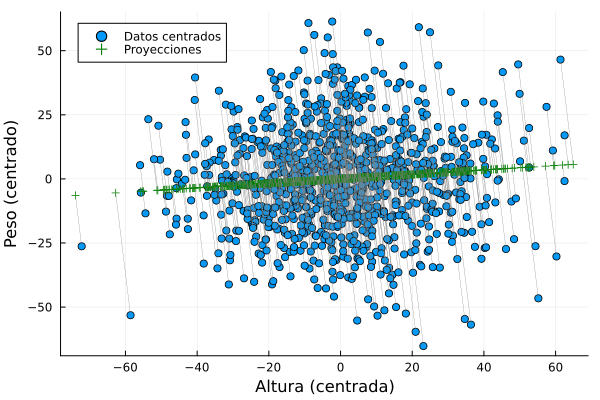

In [48]:
using LinearAlgebra
using Statistics
using Plots
using Random

# Datos simulados para 1000 personas: altura y peso
n = 1000
alturas = 160 .+ 20 .* randn(n)
pesos   = 60  .+ 20 .* randn(n)

# Matriz de datos: filas son variables (altura, peso); columnas son individuos
A0 = [alturas'; pesos']

# Centrado de datos
media = mean(A0, dims=2)
A = A0 .- media

# SVD
U, S, Vt = svd(A)
u1 = U[:, 1]  # primera componente principal (unitario)

# Proyección ortogonal sobre la recta generada por u1
proyecciones = u1 * (u1' * A)  # matriz 2×n

# Gráfico
scatter(A[1, :], A[2, :], label="Datos centrados", xlabel="Altura (centrada)", ylabel="Peso (centrado)", legend=:topleft)
quiver!([0.0], [0.0], quiver=([5*u1[1]], [5*u1[2]]), color=:red, label="1ra componente principal")
scatter!(proyecciones[1, :], proyecciones[2, :], label="Proyecciones", markershape=:cross, color=:green)

# Líneas grises desde cada punto a su proyección (error ortogonal)
for i in 1:n
    plot!([A[1, i], proyecciones[1, i]], [A[2, i], proyecciones[2, i]], color=:gray, lw=0.3, label=false)
end

display(current())


# 📊 Estadísticas detrás del PCA

Los conceptos clave en probabilidad y estadística que sustentan el PCA son la **media** y la **varianza**.

- La **media** es el promedio de los datos (en cada fila de $A_0$). Al restar estas medias, se obtiene la matriz centrada $A$.
- Las cantidades cruciales son las **varianzas** y **covarianzas**, que se pueden calcular a partir de la matriz $AA^T$:

---

## 🔢 Varianzas

Las **varianzas** son las entradas **diagonales** de la matriz $AA^T$:

- Representan la suma de cuadrados de las distancias al promedio, fila por fila de $A$.

---

## 🔁 Covarianzas

Las **covarianzas** son las entradas **fuera de la diagonal** de $AA^T$:

- Son productos escalares entre diferentes filas de $A$.
- Si las variables aumentan juntas (como edad y altura), la covarianza será positiva.

---

## 🧮 Matriz de covarianza muestral

Para tener una escala estadísticamente correcta, se divide por $n-1$, donde $n$ es el número de observaciones (columnas de $A$):

$$
S = \frac{1}{n - 1} AA^T
$$

---



## 🔍 Componentes principales

- Los **vectores propios** de $S$ (o de $AA^T$) son los **vectores singulares izquierdos** $\mathbf{u}_1$ y $\mathbf{u}_2$ de $A$.
- El primer vector $\mathbf{u}_1$ apunta en la dirección de mayor varianza de los datos (la **primera componente principal**).
- El segundo vector $\mathbf{u}_2$ es ortogonal al primero.

> ⚠️ Nota: Aunque $S = \frac{1}{n - 1} AA^T$ es una opción válida, para datos grandes suele ser más eficiente computar la descomposición SVD de $A$ directamente.



# 📐 Geometría y Álgebra Lineal detrás del PCA

## 📉 Regresión ortogonal

La mejor recta en la Figura  resuelve un problema de **mínimos cuadrados perpendiculares** (también llamado **regresión ortogonal**).  
Esto difiere del enfoque clásico de mínimos cuadrados que busca resolver $Ax = b$ minimizando la distancia vertical.

En PCA, minimizamos las **distancias perpendiculares** desde los datos hasta la recta.

---

## 🎯 Mínimo de distancias cuadradas a la línea de $u_1$

Para ver esto, descomponemos cada vector columna $a_j$ de $A$ en sus componentes a lo largo de $u_1$ y $u_2$:

$$
\sum_{j=1}^n \|a_j\|^2 = \sum_{j=1}^n |a_j^\top u_1|^2 + \sum_{j=1}^n |a_j^\top u_2|^2
$$

Observar que $|a_j^\top u_1|^2 $ es igual a $u_1^\top a_ja_j^\top u_1$, por lo que sumando nos queda
$$
\sum_{j=1}^n \|a_j\|^2 =u_1^\top AA^\top u_1 +u_2^\top AA^\top u_2
$$

El lado izquierdo está fijo (es la norma de los datos).  
Maximizar la suma del primer término equivale a **minimizar** la suma del segundo,  
lo cual corresponde a minimizar la suma de **distancias al subespacio ortogonal**.

Y eso es exactamente lo que hacemos: el vector $u_1$ es la solución de
$$
u_1=\arg\max_{\|x\|=1}x^tAA^Tx
$$
y por lo tanto la dirección $u_1$ es la que hace que la suma de las distancias de los datos al subespacio ortogonal a $u_1$ es mínima.

Observar que esto es análogo si hay más dimensiones, dado que
$$
\sum_{j=1}^n \|a_j\|^2 = \sum_{j=1}^n |a_j^\top u_1|^2 + \underbrace{\sum_{j=1}^n |a_j^\top u_2|^2 +\cdots +\sum_{j=1}^n |a_j^\top u_n|^2}_{\textrm{suma de distancias de datos a $u_1^\perp$}}
$$
---

# 🧮 Álgebra lineal detrás del PCA

El Análisis en Componentes Principales (PCA) permite comprender $n$ muestras $a_1, \dots, a_n$ en un espacio $\mathbb{R}^m$, luego de centrar los datos ($A \mathbf{1} = 0$).

La conexión fundamental con el álgebra lineal está en los **valores singulares** $\sigma_i$ y los **vectores singulares** $u_i$ de $A$.

---


Norma total de los datos: 10937.728258240188
Suma de |a_j^T u1|^2: 10853.35123748203
Suma de |a_j^T u2|^2: 84.37702075815498

Equivalente con u^T AA^T u:
u1^T AA^T u1: 10853.35123748203
u2^T AA^T u2: 84.37702075815662
Suma: 10937.728258240186

Dirección que maximiza x^T AA^T x bajo ||x||=1: [-0.8876165387019008, -0.46058319576690715]
Coincide con u1 de SVD (hasta signo): true


[ Info: Saved animation to /content/rotacion_direccion.gif



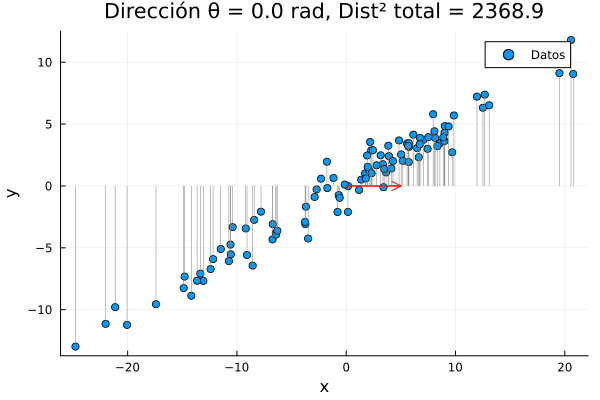

In [53]:
# PCA: minimización de la distancia al subespacio ortogonal y conexión algebraica

using LinearAlgebra
using Statistics
using Random
using Plots
using Base64

# Datos simulados: n puntos en R^2 agrupados alrededor de una dirección dominante
Random.seed!(123)
n = 100
x = 10 .* randn(n)
y = 0.5 .* x .+ randn(n)  # y depende linealmente de x con algo de ruido

# Matriz A: filas son variables, columnas son observaciones
A0 = [x'; y']

# Centrado de datos
media = mean(A0, dims=2)
A = A0 .- media

# Descomposición SVD
U, S, Vt = svd(A)
u1, u2 = U[:, 1], U[:, 2]  # vectores ortonormales en R^2

# Normas al cuadrado totales y descomposición
norma_total = sum(norm.(eachcol(A)).^2)
proy1 = sum((u1' * A).^2)  # suma de |a_j^T u1|^2
proy2 = sum((u2' * A).^2)  # suma de |a_j^T u2|^2

# Producto matricial u^T AA^T u
u1_quad = u1' * (A * A') * u1
u2_quad = u2' * (A * A') * u2

println("Norma total de los datos: ", norma_total)
println("Suma de |a_j^T u1|^2: ", proy1)
println("Suma de |a_j^T u2|^2: ", proy2)
println("\nEquivalente con u^T AA^T u:")
println("u1^T AA^T u1: ", u1_quad)
println("u2^T AA^T u2: ", u2_quad)
println("Suma: ", u1_quad + u2_quad)

# Verificación de dirección de varianza máxima
B = A * A'
eigvals, eigvecs = eigen(B)
idx = argmax(eigvals)
u1_alt = eigvecs[:, idx]

println("\nDirección que maximiza x^T AA^T x bajo ||x||=1: ", u1_alt)
println("Coincide con u1 de SVD (hasta signo): ", all(abs.(u1) .≈ abs.(u1_alt)))

# Animación: girar una dirección en el plano y mostrar proyecciones
anim = @animate for θ in range(0, stop=π, length=60)
    v = [cos(θ), sin(θ)]  # dirección a proyectar
    proy = v * (v' * A)   # proyecciones ortogonales sobre v

    # distancia cuadrada total al subespacio ortogonal
    distancia = sum([norm(A[:, i] - proy[:, i])^2 for i in 1:n])

    scatter(A[1, :], A[2, :], label="Datos", xlabel="x", ylabel="y", legend=:topright,
            title="Dirección θ = $(round(θ, digits=2)) rad, Dist² total = $(round(distancia, digits=1))")
    quiver!([0.0], [0.0], quiver=([5*v[1]], [5*v[2]]), color=:red, label="Dirección v")

    # líneas grises desde cada punto a su proyección
    for i in 1:n
        plot!([A[1, i], proy[1, i]], [A[2, i], proy[2, i]], color=:gray, lw=0.5, label=false)
    end
end

path = "rotacion_direccion.gif"
gif(anim, path, fps=15)

# Mostrar en notebook (Colab compatible)
open(path, "r") do f
    base64_img = base64encode(f)
    display("text/html", "<img src='data:image/gif;base64,$base64_img'>")
end


# 🎯 Comparación entre PCA y Regresión por Mínimos Cuadrados

En este experimento, usamos la misma matriz de datos $A$ para comparar **PCA** y **regresión lineal por mínimos cuadrados**.

## 📌 Objetivo de cada método

| Método                  | ¿Qué minimiza?                          | ¿Uso principal?                             |
|-------------------------|-----------------------------------------|---------------------------------------------|
| **PCA**                 | Distancias **ortogonales**              | Reducción de dimensión, compresión, análisis |
| **Mínimos Cuadrados**   | Distancias **verticales**               | Predicción de una variable dependiente       |

---

## 📐 Geometría

- **Regresión lineal** busca una recta del tipo $y = \beta_0 + \beta_1 x$ que minimice errores **en el eje $y$** (verticales).
- **PCA** busca una recta (en **cualquier dirección**) que minimice los errores **perpendiculares** desde los datos a la recta.

---

## 🧮 Detalles del código

- Generamos datos $(x, y)$ donde $y$ depende linealmente de $x$ con ruido.
- Centramos los datos (como requiere PCA).
- Aplicamos:
  - **Regresión**: resolviendo $X^T X \beta = X^T y$.
  - **PCA**: descomposición SVD de $A$, y usamos el primer vector singular $u_1$.

---

## 📊 El gráfico muestra:

- Los datos centrados $(x, y)$.
- La recta de **regresión** en verde, con líneas verticales desde los puntos a la recta.
- La recta de **PCA** en rojo, con líneas ortogonales desde los puntos a la recta.

---

## 🤔 Conclusión

- PCA **no asume variable dependiente**, y trata todas las variables simétricamente.
- Regresión asume que $x$ explica a $y$.
- Si el interés está en **explicar una variable a partir de otra**, usamos **regresión**.
- Si el objetivo es **reducir la dimensionalidad** sin distinguir variables, usamos **PCA**.
